In [23]:
import numpy as np
from scipy import signal as sgl
from matplotlib import pyplot as plt
import numba
import matplotlib as mpl
mpl.rcParams['font.size'] = 20

@numba.njit # 17.5 seconds for 302s of sim with dt = 1ms and 2000 parallel nodes (Numba jit)
def simulate(params, length = 302, dt = 1, num_sim = 2000, initial_conditions = np.array([0.25,0.25])):
    time_series_E = np.zeros((int(1000/dt*length),int(num_sim)))
    time_series_I = np.zeros((int(1000/dt*length),int(num_sim)))
    time_series_E[0] = initial_conditions[0]
    time_series_I[0] = initial_conditions[1]
    # Forward euler performed in-place within the time_series_X arrays to maximize speed
    for i in range(int(1000/dt*length)-1):
        time_series_E[i+1] = params[0] * time_series_E[i] - params[2] * time_series_I[i] + params[18] - params[9]
        time_series_I[i+1] = params[1] * time_series_E[i] - params[3] * time_series_I[i] + params[19] - params[13]
        time_series_E[i+1] = params[8] / (1 + np.exp(-params[6]* (params[20] * time_series_E[i+1] - params[7])))
        time_series_I[i+1] = params[12] / (1 + np.exp(-params[10]* (params[21] * time_series_I[i+1] - params[11])))
        time_series_E[i+1] = dt * (((params[16] - params[14] * time_series_E[i]) * time_series_E[i+1]) - time_series_E[i]) / params[4] 
        time_series_I[i+1] = dt * (((params[17] - params[15] * time_series_I[i]) * time_series_I[i+1]) - time_series_I[i]) / params[5] 
        time_series_E[i+1] += time_series_E[i] 
        time_series_I[i+1] += time_series_I[i] 
    return time_series_E, time_series_I

parameters_original = np.array([1.6000e+01, 1.2000e+01, 1.5000e+01, 3.0000e+00, 8.0000e+00, 8.0000e+00,
        1.3000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 3.7000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.500e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00])

parameters_alpha_peak = np.array([1.6000e+01, 1.2000e+01, 1.5000e+01, 3.0000e+00, 35.0000e+00, 35.0000e+00,
        1.3000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 3.7000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.500e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00])


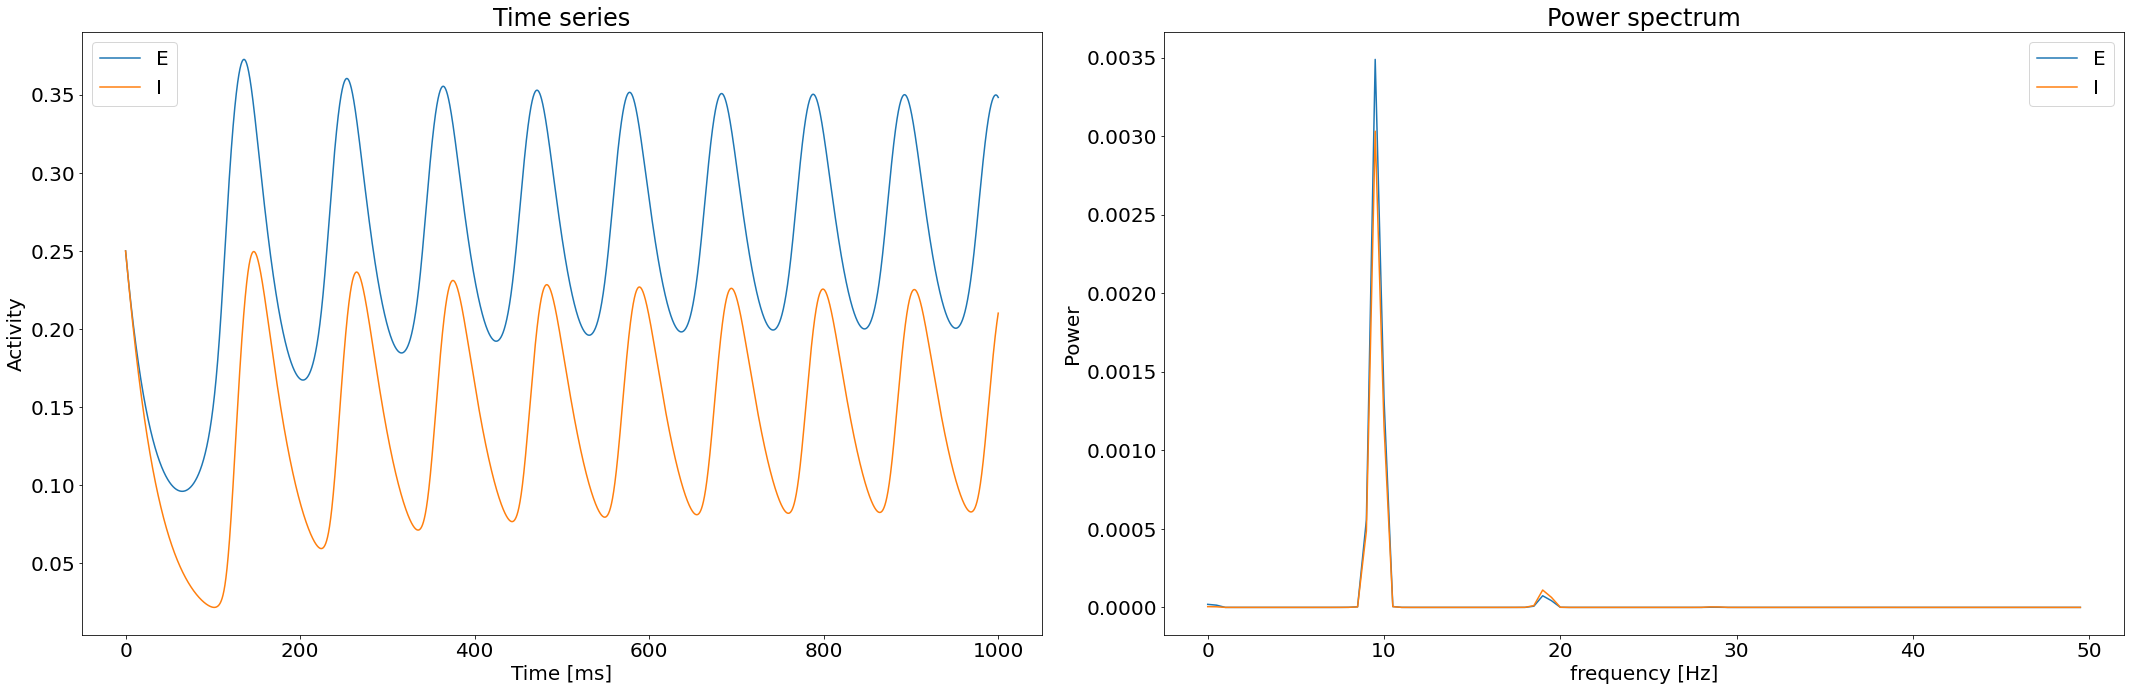

In [24]:
parameters = np.array([1.6000e+01, 1.2000e+01, 1.5000e+01, 3.0000e+00, 35.0000e+00, 35.0000e+00,
        1.3000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 3.7000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.500e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00])
dt = 0.01

# Simulate
time_series_E, time_series_I = simulate(parameters,length = 5.0, dt=dt, num_sim = 1)
t = np.arange(int(1000/dt))*dt

# PLot
f = plt.figure(figsize=(30,10))
# Timeseries
ax = plt.subplot(1,2,1)
ax.plot(t,time_series_E[:int(1000/dt),0], label = "E")
ax.plot(t,time_series_I[:int(1000/dt),0], label = "I")
plt.xlabel('Time [ms]')
plt.ylabel('Activity')
plt.title('Time series')
plt.legend()
# PSD
ax = plt.subplot(1,2,2)
f , psd = sgl.welch(time_series_E[:,0],fs=(1000/dt), nperseg=2000/dt)
plt.plot(f[:100],psd[:100], label = "E")
f , psd = sgl.welch(time_series_I[:,0],fs=(1000/dt), nperseg=2000/dt)
plt.plot(f[:100],psd[:100], label = "I")
plt.xlabel('frequency [Hz]')
plt.ylabel('Power')
plt.title('Power spectrum')
plt.legend()
plt.tight_layout()
plt.show()